# CAEE 202 Basic Dispersion Example

## Load modules and define advection-dispersion function

In [20]:
# Load needed modules
import numpy as np
import matplotlib.pyplot as plt

# Define function for 1 D advection dispersion function, no reaction, Fickian
def concvst(t, M, A, E, U, k, x):  
    A = M / (2 * A * np.sqrt(np.pi * E * t))
    argument = ((x - U * t)**2) / ( 4 * E * t) + k * t
    return A * np.exp(-argument)

## Problem inputs

In [21]:
M = 2500                 # lbs
v = 2.2                   # ft/s
A = 2150            # ft^2
E = 3.5                  # mi^2/d
k = 0.005                # 1/d
x = 39.2                 # mi

MCL = 0.2                # ug/L - Used to scale closeup plot
figure_title = "Concentration at Queen Lake"     # This will be the title of the plot

## Unit conversions (no modications needed)

In [22]:
M = M / 2.2                     # kg
v = v * 0.3048                  # m/s
A = A * (0.3048**2)             # m^2
E = E * (1609**2) / 86400       # m^2/s
k = k / 86400                   # 1/s
x = x * 1609                    # m

## Run the function and plot

Text(0.5, 0.98, 'Concentration at Hades')

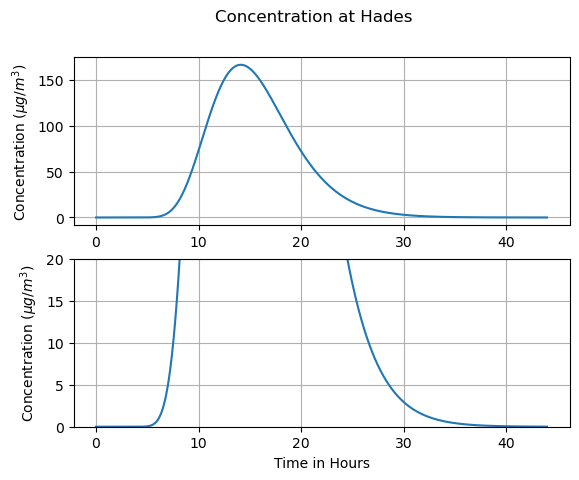

In [23]:
# Create time range, run to 3*residence time
time_range = np.linspace(0.1, 3 * x/v, num=2000)    # For function
time_range_hours = time_range / 3600                # For plotting

# Calculate concentration, first SI Units will be kg/m^3 then convert to ug/L
concentration = concvst(time_range, M, A, E, v, k, x)    
concentration_ug_L = concentration * 1e9 / 1000 # 1e9 ug/kg, 1000 L/m3

# Do two subplots; first one full y-scale, second zoomed in to 2x MCL
fig, ax = plt.subplots(2, 1)
for i in range(2):
    ax[i].plot(time_range_hours, concentration_ug_L)
    ax[i].grid("True")
    ax[i].set_ylabel('Concentration ($\mu g/m^3$)')
ax[1].set_ylim([0, 2*MCL])
ax[1].set_xlabel('Time in Hours')
fig.suptitle(figure_title)